In [23]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.cluster import KMeans
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

In [2]:
df = pd.read_csv('../Data/clustering_data.csv')

In [3]:
df.fillna(0, inplace=True)

## 남녀 매출 비율 데이터로 inertia값을 구하고 엘보우 그래프 찍어보기

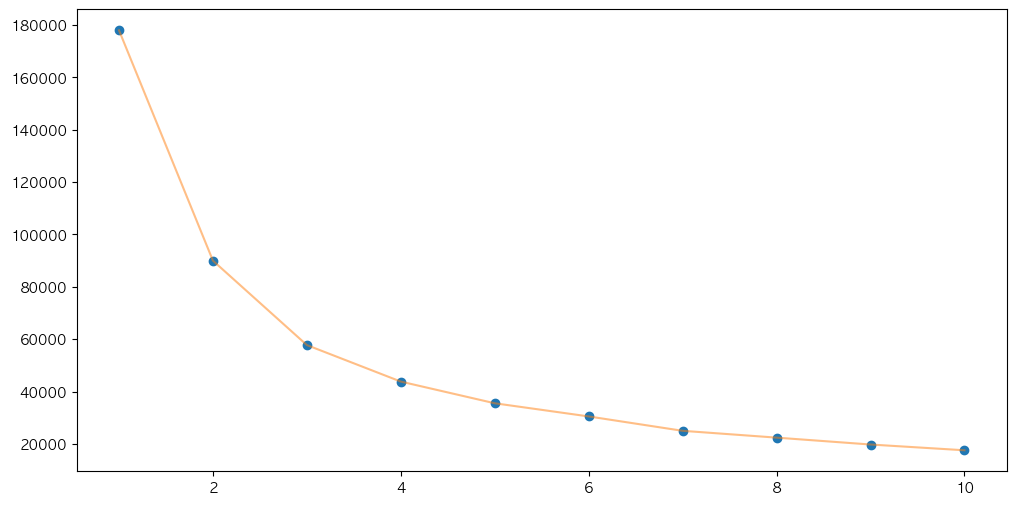

In [4]:
inertiaArr = []
k_length = range(1, 11)

for i in k_length :
    data_points = df.loc[:, ['남성_매출_비율', '여성_매출_비율']].values
    kmeans = KMeans(n_clusters=i).fit(data_points)
    inertia = kmeans.inertia_
    
    inertiaArr.append(inertia)
    
inertiaArr1 = np.array(inertiaArr)

plt.figure(1 , figsize = (12, 6))
plt.plot(k_length , inertiaArr1 , 'o')
plt.plot(k_length , inertiaArr1 , '-' , alpha = 0.5)

plt.show()

### 4부터 완만해지기 시작 k값은 4로 결정
<br> 

---

<br>

### cluster_id 값을 부여하기 위해 남녀 매출 비율과 그 외 필요할 컬럼만 따로 변수에 담아준다

In [5]:
genderDF = df.loc[:, ['상권_구분_코드_명', '시군구명',
            '행정동_코드_명', '상권_코드_명', '남성_매출_비율', '여성_매출_비율']]
genderDF.head()

,상권_구분_코드_명,시군구명,행정동_코드_명,상권_코드_명,남성_매출_비율,여성_매출_비율
0,골목상권,종로구,청운효자동,옥인길,32.315737,64.334507
1,골목상권,종로구,사직동,자하문로7길,46.319319,46.406292
2,골목상권,종로구,사직동,필운대로1길,29.842881,63.937527
3,골목상권,종로구,삼청동,북촌로5길,42.133291,53.231589
4,골목상권,종로구,삼청동,북촌로5나길,52.104090,42.916145


## k 값을 4로 넣어서 clustering

In [6]:
data_points = genderDF.iloc[:, 4:].values
kmeans = KMeans(n_clusters = 4).fit(data_points)
genderDF['cluster_id'] = kmeans.labels_
genderDF

,상권_구분_코드_명,시군구명,행정동_코드_명,상권_코드_명,남성_매출_비율,여성_매출_비율,cluster_id
0,골목상권,종로구,청운효자동,옥인길,32.315737,64.334507,1
1,골목상권,종로구,사직동,자하문로7길,46.319319,46.406292,1
2,골목상권,종로구,사직동,필운대로1길,29.842881,63.937527,1
3,골목상권,종로구,삼청동,북촌로5길,42.133291,53.231589,1
4,골목상권,종로구,삼청동,북촌로5나길,52.104090,42.916145,3
...,...,...,...,...,...,...,...
1463,관광특구,중구,소공동,명동 남대문 북창동 다동 무교동 관광특구,51.164187,40.468569,3
1464,관광특구,중구,광희동,동대문패션타운 관광특구,51.778618,44.994222,3
1465,관광특구,용산구,이태원1동,이태원 관광특구,50.866740,44.407033,3
1466,관광특구,강남구,삼성1동,강남 마이스 관광특구,42.856503,51.823085,1


## clustering한 데이터 분포도 찍어보기

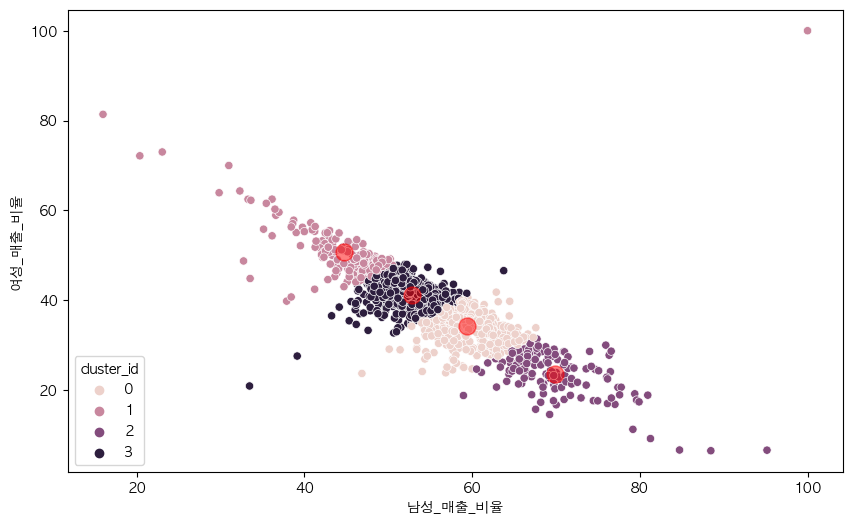

In [7]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x = '남성_매출_비율', y = '여성_매출_비율', data = genderDF, hue = 'cluster_id')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', alpha=0.5, s=150)

plt.show()

In [84]:
genderDF

,상권_구분_코드_명,시군구명,행정동_코드_명,상권_코드_명,남성_매출_비율,여성_매출_비율,cluster_id,위도,경도
0,골목상권,종로구,청운효자동,옥인길,32.315737,64.334507,1,37.580697,126.966478
1,골목상권,종로구,사직동,자하문로7길,46.319319,46.406292,1,37.579085,126.970328
2,골목상권,종로구,사직동,필운대로1길,29.842881,63.937527,1,37.578066,126.966615
3,골목상권,종로구,삼청동,북촌로5길,42.133291,53.231589,1,37.580349,126.981694
4,골목상권,종로구,삼청동,북촌로5나길,52.104090,42.916145,3,37.585791,126.983017
...,...,...,...,...,...,...,...,...,...
1463,관광특구,중구,소공동,명동 남대문 북창동 다동 무교동 관광특구,51.164187,40.468569,3,37.564149,126.981856
1464,관광특구,중구,광희동,동대문패션타운 관광특구,51.778618,44.994222,3,37.567312,127.011025
1465,관광특구,용산구,이태원1동,이태원 관광특구,50.866740,44.407033,3,37.534435,126.994377
1466,관광특구,강남구,삼성1동,강남 마이스 관광특구,42.856503,51.823085,1,37.511003,127.060059


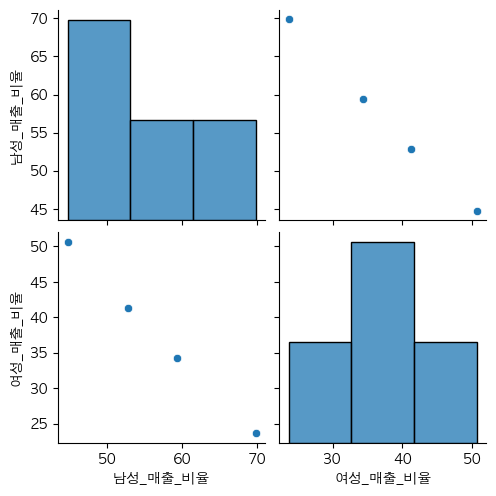

In [87]:
genderCluster = pd.pivot_table(genderDF, index = 'cluster_id', values = genderDF.iloc[:, 4:6], aggfunc = 'mean')

sns.pairplot(genderCluster)
plt.show()

In [88]:
genderCluster

,남성_매출_비율,여성_매출_비율
cluster_id,,
0,59.389388,34.310162
1,44.759921,50.660252
2,69.832934,23.682271
3,52.862943,41.257601


---

<br>

## 연령대별 clustering - 진행 방식은 위와 동일함

In [8]:
ageDF = df.loc[:, ['상권_구분_코드_명', '시군구명',
            '행정동_코드_명', '상권_코드_명', '연령대_10_매출_비율', '연령대_20_매출_비율', '연령대_30_매출_비율', '연령대_40_매출_비율',
       '연령대_50_매출_비율', '연령대_60_이상_매출_비율']]
ageDF.head()

,상권_구분_코드_명,시군구명,행정동_코드_명,상권_코드_명,연령대_10_매출_비율,연령대_20_매출_비율,연령대_30_매출_비율,연령대_40_매출_비율,연령대_50_매출_비율,연령대_60_이상_매출_비율
0,골목상권,종로구,청운효자동,옥인길,1.000000,31.668061,28.521003,15.815119,11.714112,4.706820
1,골목상권,종로구,사직동,자하문로7길,1.039259,25.979521,22.742593,15.815492,15.407403,6.357637
2,골목상권,종로구,사직동,필운대로1길,2.218580,33.396169,27.397357,12.484138,11.055735,4.208888
3,골목상권,종로구,삼청동,북촌로5길,1.234775,25.044581,24.493699,19.164813,15.807167,5.908604
4,골목상권,종로구,삼청동,북촌로5나길,1.000000,19.765403,26.144805,20.719083,16.485072,8.046473


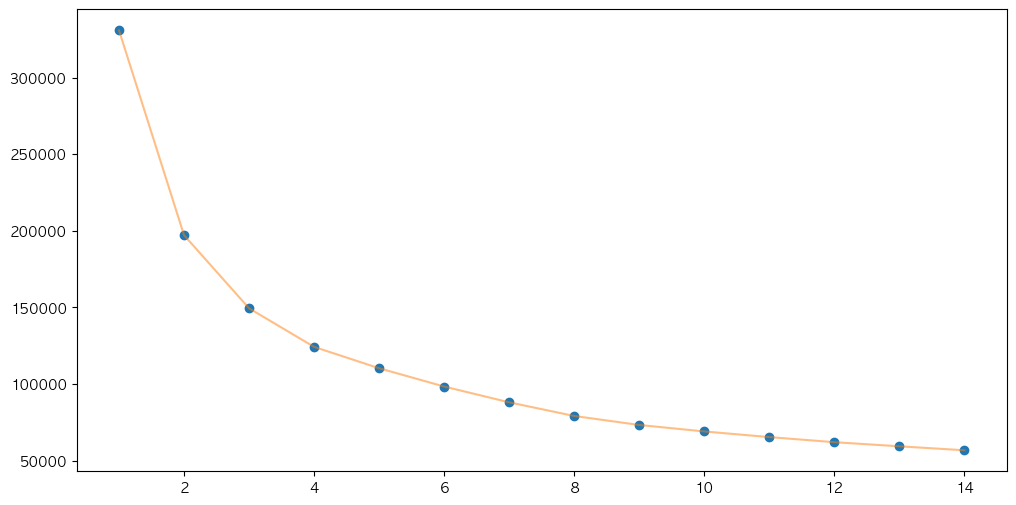

In [9]:
inertiaArr = []
k_length = range(1, 15)

for i in k_length :
    data_points = ageDF.iloc[:, 4:].values
    kmeans = KMeans(n_clusters=i).fit(data_points)
    inertia = kmeans.inertia_
    
    inertiaArr.append(inertia)
    
inertiaArr1 = np.array(inertiaArr)

plt.figure(1 , figsize = (12, 6))
plt.plot(k_length , inertiaArr1 , 'o')
plt.plot(k_length , inertiaArr1 , '-' , alpha = 0.5)

plt.show()


### 5,6 정도가 k값으로 적당해 보인다.

<br>

In [103]:
data_points = ageDF.iloc[:, 4:].values
kmeans = KMeans(n_clusters = 6).fit(data_points)
ageDF['cluster_id'] = kmeans.labels_

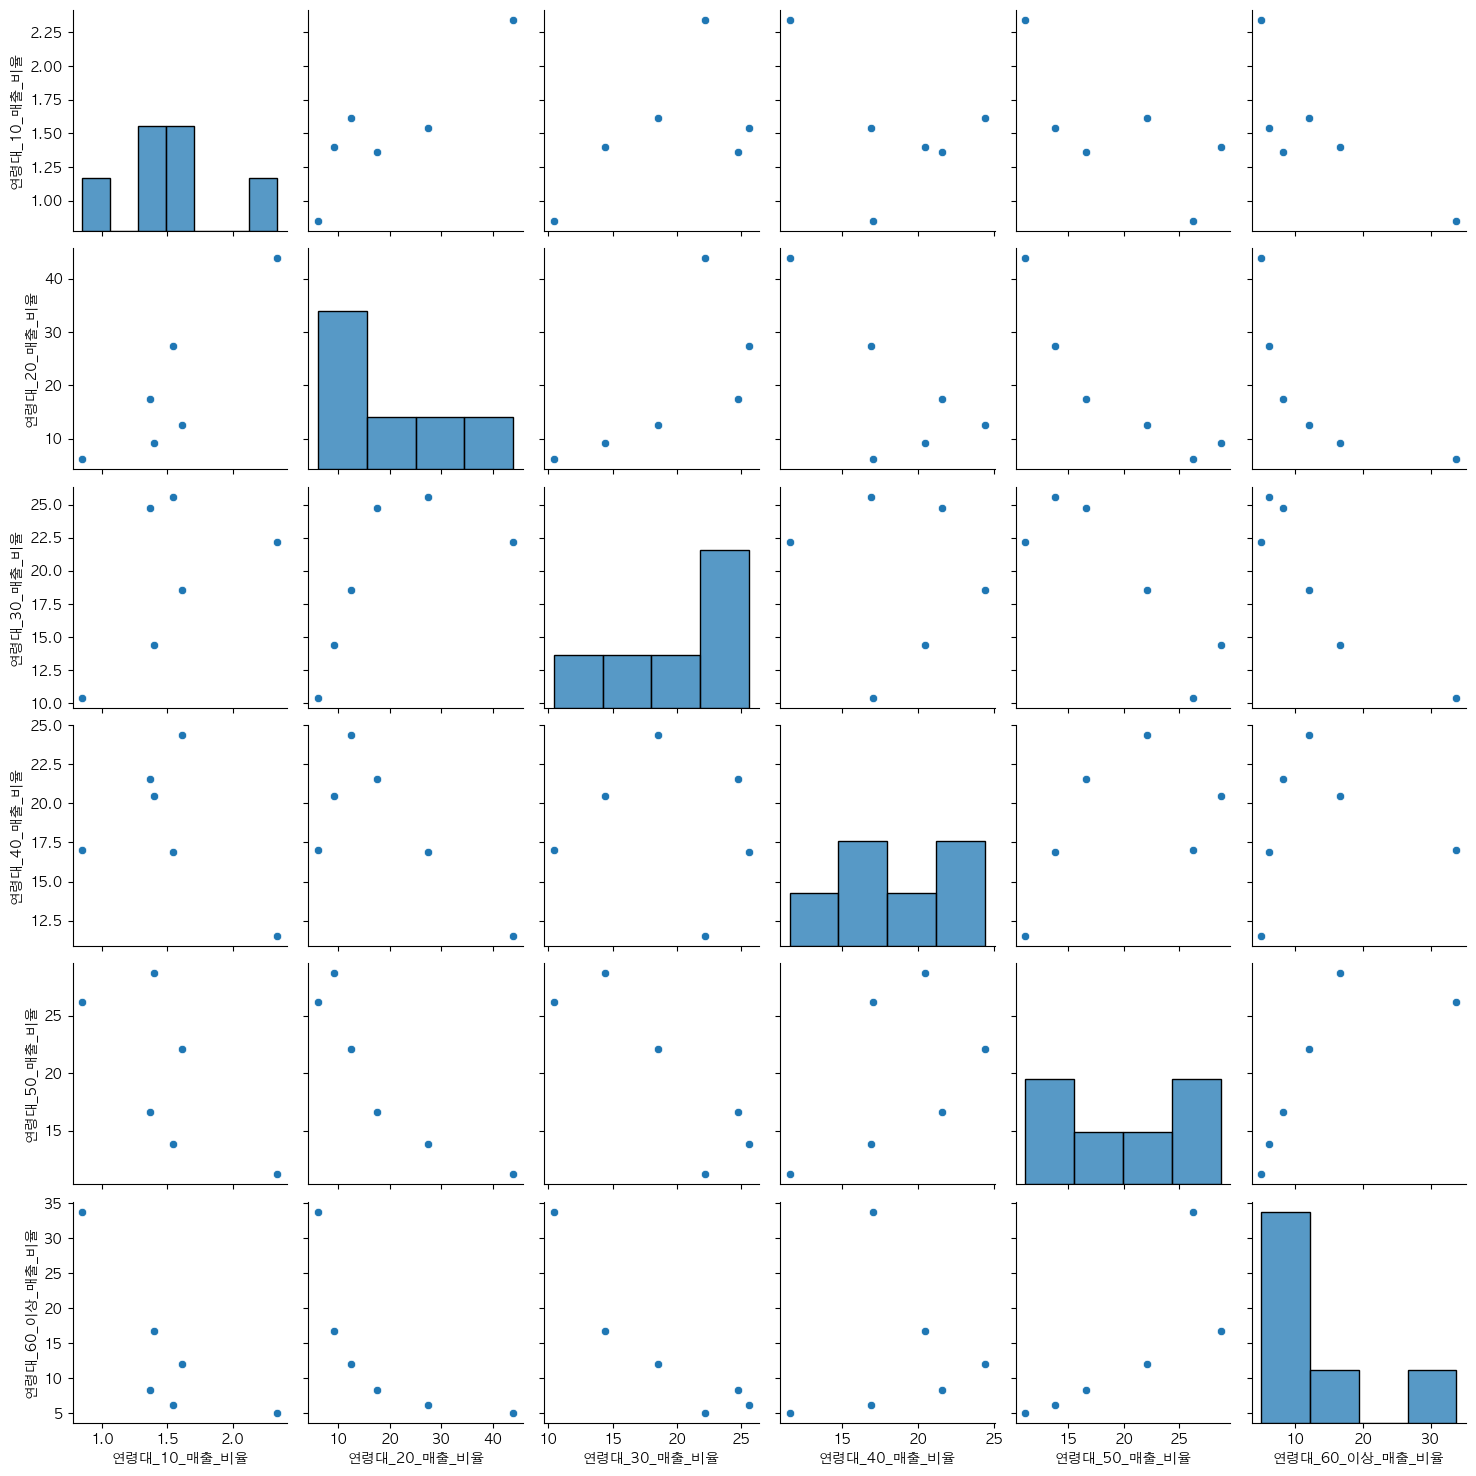

In [104]:
ageCluster = pd.pivot_table(ageDF, index = 'cluster_id', values = ageDF.iloc[:, 4:10], aggfunc = 'mean')

sns.pairplot(ageCluster)
plt.show()

In [105]:
ageCluster
# 40대 = 0
# 30대 = 1

# 30대 = 2

# 50대 = 3
# 20대 = 4
# 60대 이상 = 5

,연령대_10_매출_비율,연령대_20_매출_비율,연령대_30_매출_비율,연령대_40_매출_비율,연령대_50_매출_비율,연령대_60_이상_매출_비율
cluster_id,,,,,,
0,1.614502,12.546190,18.539374,24.364496,22.097417,12.037440
1,1.540620,27.420093,25.597327,16.911104,13.809898,6.164948
2,1.364172,17.522853,24.710101,21.555955,16.636017,8.278131
3,1.400669,9.286366,14.368369,20.450219,28.678045,16.728100
4,2.341571,43.853904,22.169299,11.529075,11.204078,5.073011
5,0.848638,6.157413,10.432193,17.000287,26.215626,33.792184


In [125]:
ageDF.to_csv('../Data/ageDF.csv', index=False)

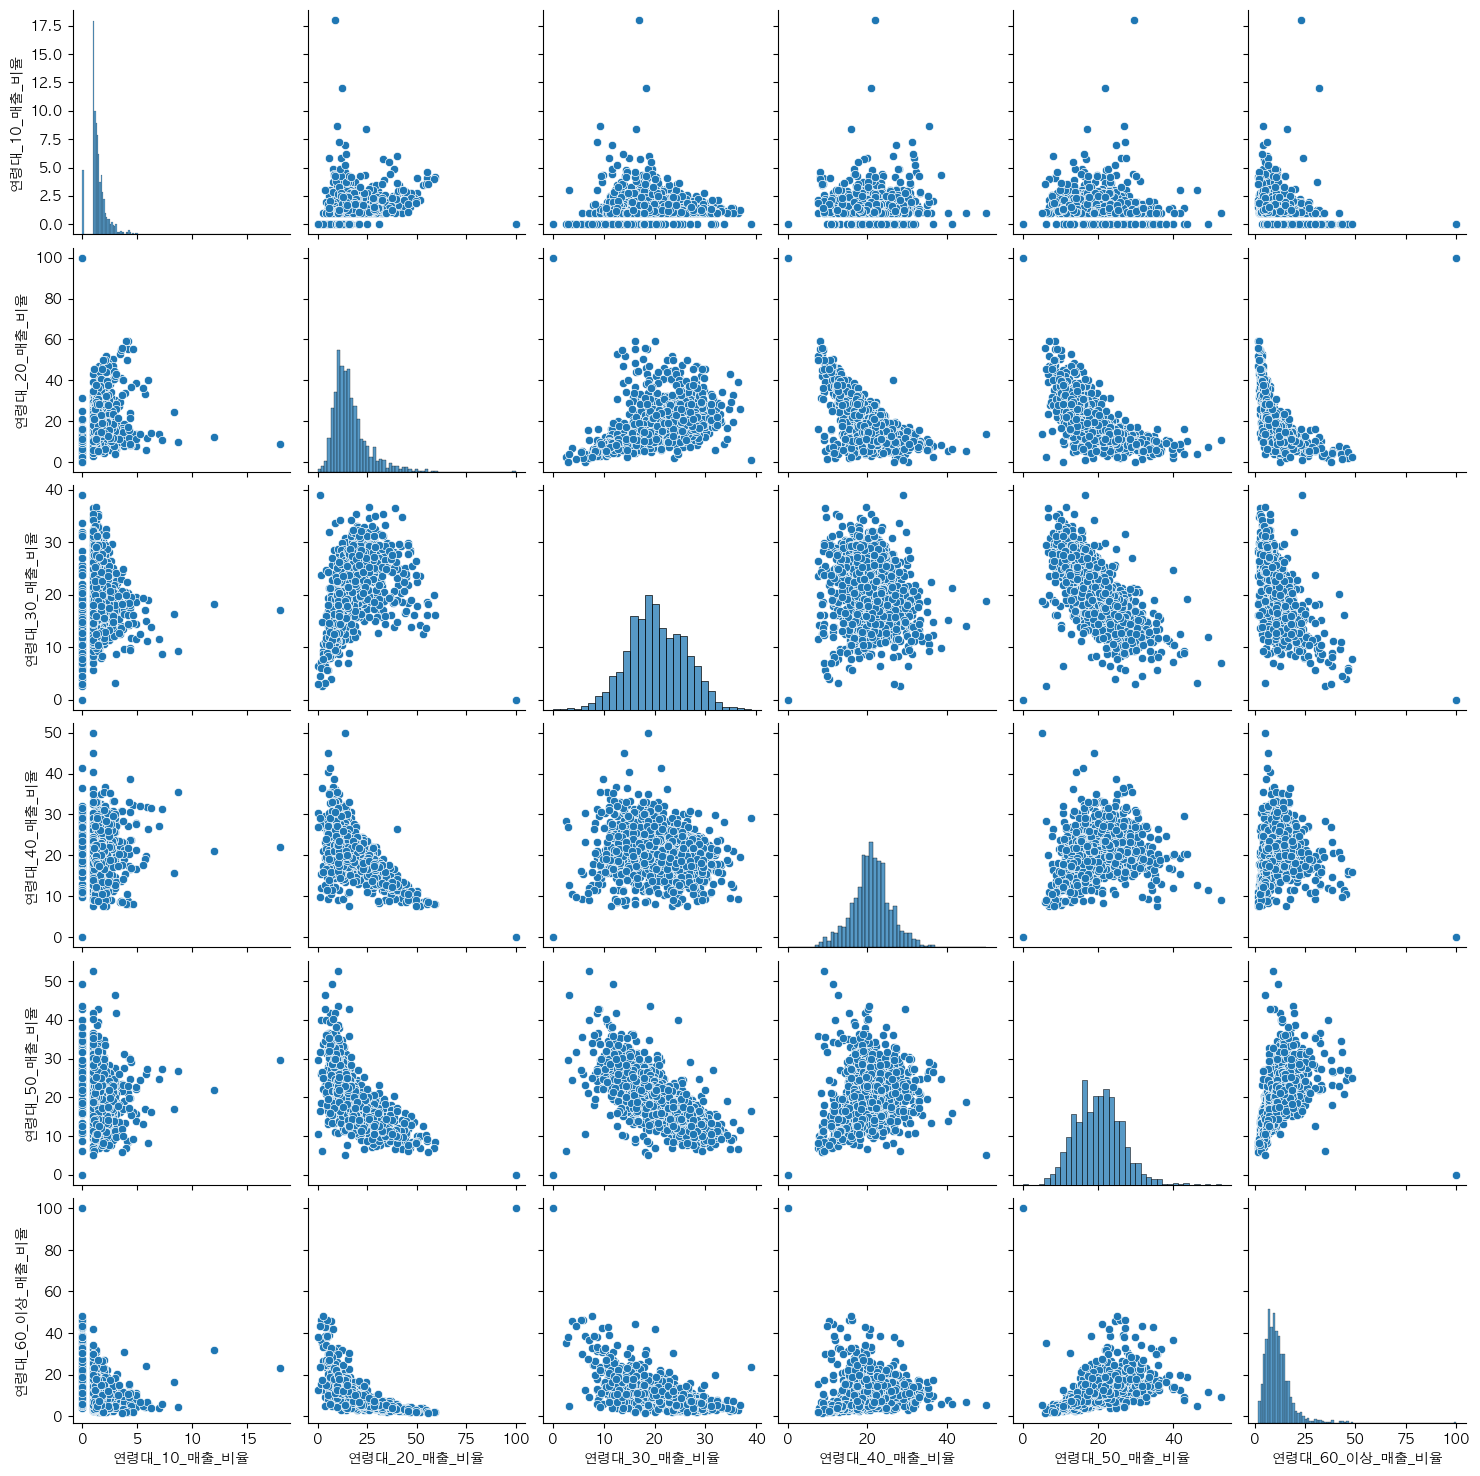

In [92]:
sns.pairplot(ageDF.iloc[:, 4:10])

### cluster별로 데이터를 합치고 mean값을 구하고 데이터를 보았을 때
#### 10대를 제외한 나머지 연령대에 고루 분포된 것이 확인된다.

---

## 시간대별로 구해보자

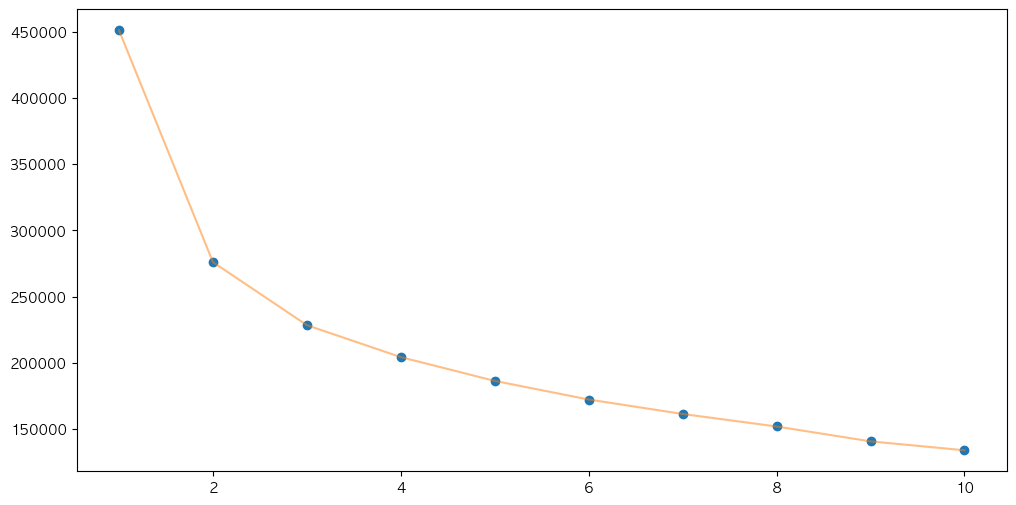

In [193]:
timeDF = df.loc[:, ['상권_구분_코드_명', '시군구명', '행정동_코드_명', '상권_코드_명',
                   '시간대_00~06_매출_비율', '시간대_06~11_매출_비율', '시간대_11~14_매출_비율',
                    '시간대_14~17_매출_비율', '시간대_17~21_매출_비율', '시간대_21~24_매출_비율']]

inertiaArr = []
k_length = range(1, 11)

for i in k_length :
    data_points = timeDF.iloc[:, 4:].values
    kmeans = KMeans(n_clusters=i).fit(data_points)
    inertia = kmeans.inertia_
    
    inertiaArr.append(inertia)
    
inertiaArr1 = np.array(inertiaArr)

plt.figure(1 , figsize = (12, 6))
plt.plot(k_length , inertiaArr1 , 'o')
plt.plot(k_length , inertiaArr1 , '-' , alpha = 0.5)

plt.show()

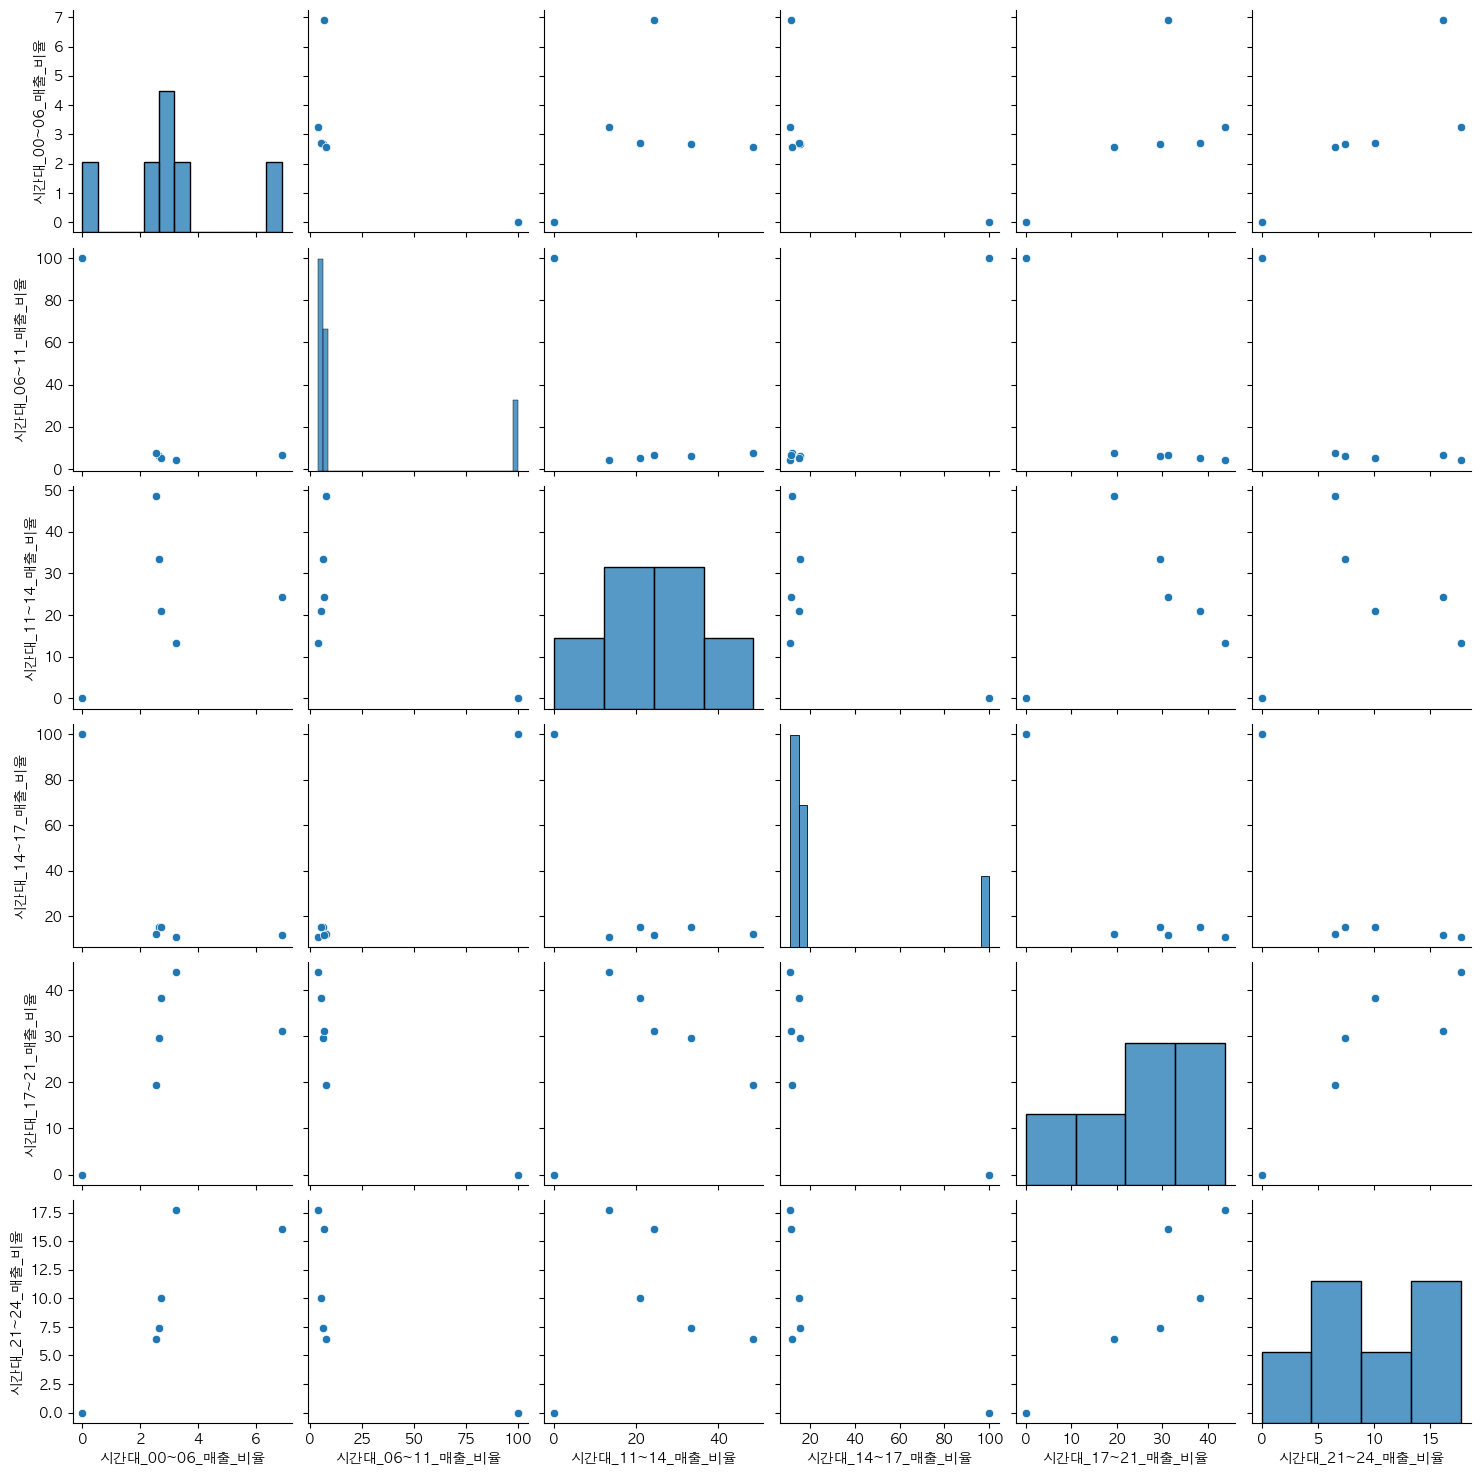

In [191]:
data_points = timeDF.iloc[:, 4:10].values
kmeans = KMeans(n_clusters = 6).fit(data_points)
timeDF['cluster_id'] = kmeans.labels_
timeDF

timeCluster = pd.pivot_table(timeDF, index = 'cluster_id', values = timeDF.iloc[:, 4:10], aggfunc = 'mean')

sns.pairplot(timeCluster)
plt.show()

## 상권별로 가장 높은 매출비율 데이터만 가져와서 새로운 데이터프레임으로 만들기

In [224]:
상권_코드_명 = ['1']
컬럼명 = ['1']


sales_ratio = [] # 매출비율 저장할 변수
name = [] # 상권명 저장할 변수
time_group = [] # 시간대 저장할 변수

for i in range(len(timeDF)) :
    시간대별_매출 = [0]
    for j in range(4, 10) :
        if timeDF.iloc[i, j] > 시간대별_매출[0] :
            상권_코드_명[0] = timeDF.iloc[i, 3]
            컬럼명[0] = timeDF.columns[j]
            시간대별_매출[0] = timeDF.iloc[i, j]
            
    sales_ratio.append(시간대별_매출[0])
    name.append(상권_코드_명[0])
    time_group.append(컬럼명[0])
    
timeDF_02 = pd.DataFrame(name, sales_ratio)
timeDF_02['시간대'] = time_group
timeDF_02.reset_index(inplace=True)
timeDF_02.columns = ['매출_비율', '상권_코드_명', '시간대']

timeDF_02

,매출_비율,상권_코드_명,시간대
0,28.589645,옥인길,시간대_17~21_매출_비율
1,38.479648,자하문로7길,시간대_17~21_매출_비율
2,32.929625,필운대로1길,시간대_11~14_매출_비율
3,31.970780,북촌로5길,시간대_17~21_매출_비율
4,35.222309,북촌로5나길,시간대_17~21_매출_비율
...,...,...,...
1463,30.589270,명동 남대문 북창동 다동 무교동 관광특구,시간대_11~14_매출_비율
1464,31.321319,동대문패션타운 관광특구,시간대_17~21_매출_비율
1465,39.348431,이태원 관광특구,시간대_17~21_매출_비율
1466,36.960781,강남 마이스 관광특구,시간대_11~14_매출_비율


In [169]:
timeCluster

,시간대_00~06_매출_비율,시간대_06~11_매출_비율,시간대_11~14_매출_비율,시간대_14~17_매출_비율,시간대_17~21_매출_비율,시간대_21~24_매출_비율
cluster_id,,,,,,
0,2.476151,7.755662,49.456987,12.239155,18.840029,6.285536
1,3.226332,4.005034,13.351801,10.970132,43.891734,17.877622
2,2.736692,5.165427,20.770026,15.277355,38.563614,10.063217
3,2.680526,6.206582,33.787598,15.201942,29.357670,7.425146
4,6.579025,6.597978,24.259864,11.815349,31.166188,15.537235
5,0.000000,100.000000,0.000000,100.000000,0.000000,0.000000


In [170]:
# 청량리농수산물시장
# timeDF[timeDF.상권_코드_명 == '청량리농수산물시장']
timeDF.drop(1300, inplace=True)
timeDF[timeDF.index == 1300]

,상권_구분_코드_명,시군구명,행정동_코드_명,상권_코드_명,시간대_00~06_매출_비율,시간대_06~11_매출_비율,시간대_11~14_매출_비율,시간대_14~17_매출_비율,시간대_17~21_매출_비율,시간대_21~24_매출_비율,cluster_id


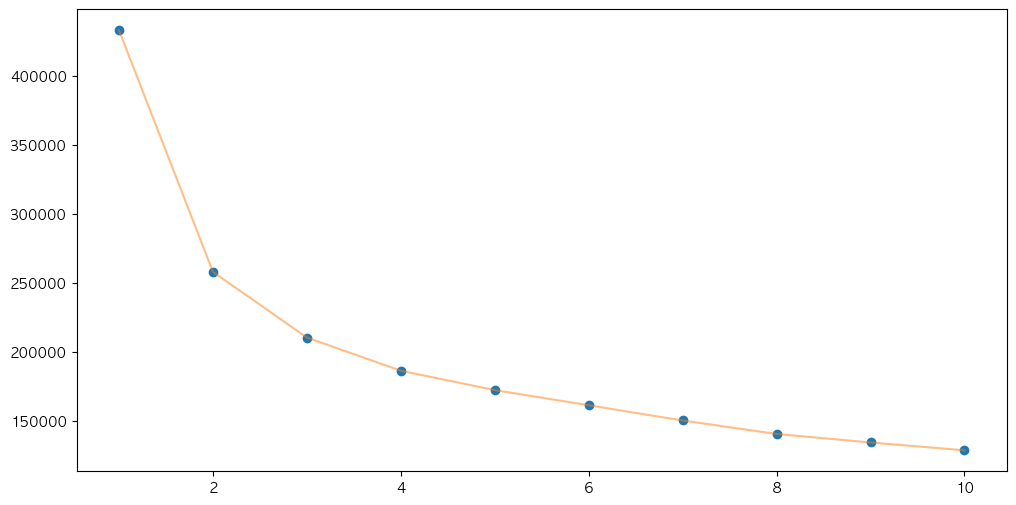

In [171]:
inertiaArr = []
k_length = range(1, 11)

for i in k_length :
    data_points = timeDF.iloc[:, 4:10].values
    kmeans = KMeans(n_clusters=i).fit(data_points)
    inertia = kmeans.inertia_
    
    inertiaArr.append(inertia)
    
inertiaArr1 = np.array(inertiaArr)

plt.figure(1 , figsize = (12, 6))
plt.plot(k_length , inertiaArr1 , 'o')
plt.plot(k_length , inertiaArr1 , '-' , alpha = 0.5)

plt.show()

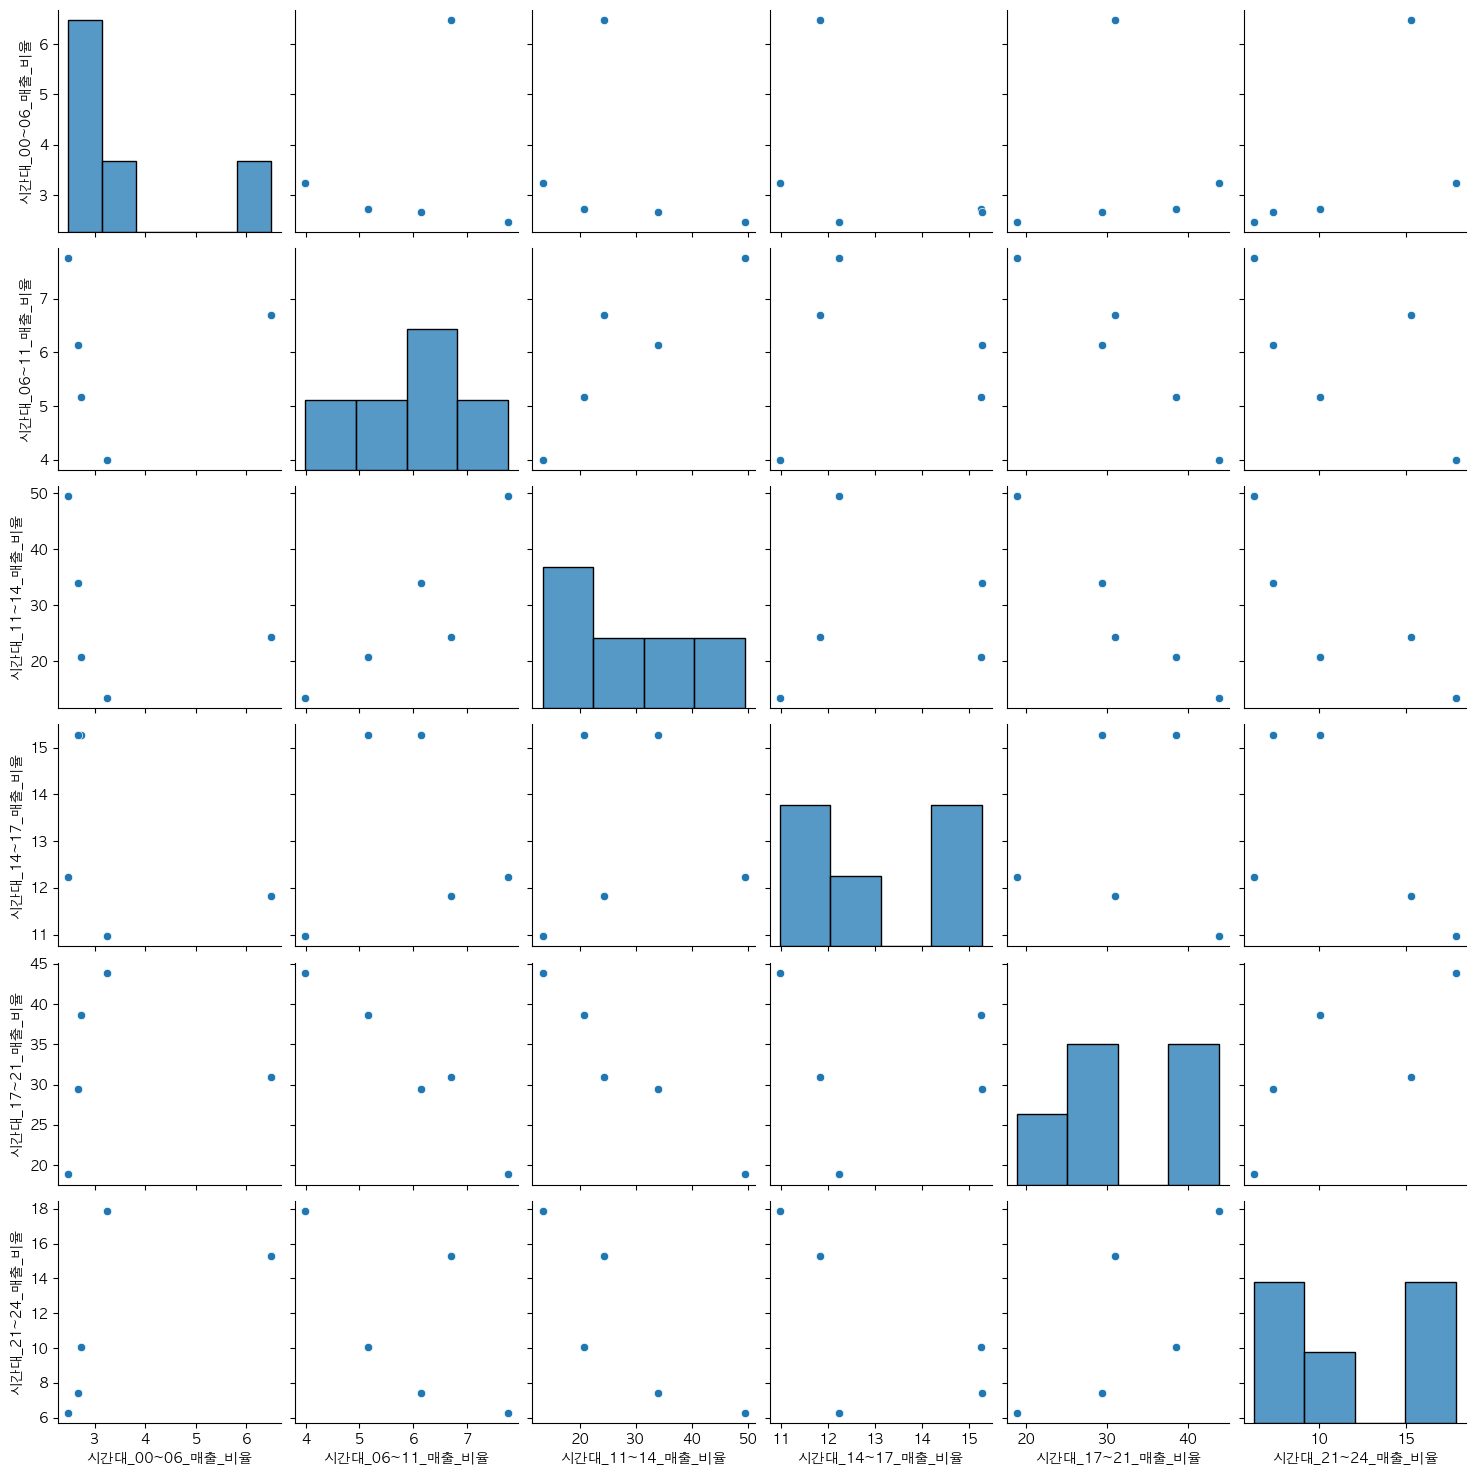

In [188]:
data_points = timeDF.iloc[:, 4:10].values
kmeans = KMeans(n_clusters = 5).fit(data_points)
timeDF['cluster_id'] = kmeans.labels_
timeDF

timeCluster = pd.pivot_table(timeDF, index = 'cluster_id', values = timeDF.iloc[:, 4:10], aggfunc = 'mean')

sns.pairplot(timeCluster)
plt.show()

In [189]:
timeCluster

# 0 = 14 ~ 17
# 1 = 11 ~ 14
# 3 = 17 ~ 21
# 4 = 21 ~ 24

,시간대_00~06_매출_비율,시간대_06~11_매출_비율,시간대_11~14_매출_비율,시간대_14~17_매출_비율,시간대_17~21_매출_비율,시간대_21~24_매출_비율
cluster_id,,,,,,
0,6.475286,6.694624,24.313784,11.818988,30.982907,15.281665
1,3.245939,3.996858,13.384877,10.963099,43.884690,17.884764
2,2.476151,7.755662,49.456987,12.239155,18.840029,6.285536
3,2.727258,5.165379,20.762453,15.276309,38.576311,10.067737
4,2.671747,6.145702,33.928155,15.283791,29.420165,7.410554


In [187]:
timeDF[timeDF.cluster_id == 4]

,상권_구분_코드_명,시군구명,행정동_코드_명,상권_코드_명,시간대_00~06_매출_비율,시간대_06~11_매출_비율,시간대_11~14_매출_비율,시간대_14~17_매출_비율,시간대_17~21_매출_비율,시간대_21~24_매출_비율,cluster_id
11,골목상권,종로구,종로1.2.3.4가동,돈화문로11가길,5.429844,4.479238,20.890116,13.613610,31.270670,13.919941,4
20,골목상권,종로구,창신2동,창신5길,5.383213,1.709976,26.429702,17.323570,33.620392,16.349210,4
21,골목상권,종로구,창신2동,창신길,57.000000,8.246211,50.732881,16.981601,18.764070,57.410462,4
34,골목상권,중구,장충동,퇴계로56길,3.593946,2.530131,31.675048,7.457253,31.022730,15.964964,4
45,골목상권,중구,동화동,다산로36길,8.303022,5.841178,28.566023,11.848718,28.437520,26.591996,4
...,...,...,...,...,...,...,...,...,...,...,...
1385,전통시장,강서구,등촌3동,신월중앙시장,15.000000,1.769228,37.134157,16.817404,28.725524,22.888427,4
1408,전통시장,영등포구,문래동,영일시장,0.000000,1.000000,37.092937,2.514867,33.143902,27.981213,4
1440,전통시장,서초구,양재1동,양재시장,6.000000,21.722049,25.381866,6.775700,36.530266,15.687746,4
1441,전통시장,강남구,신사동,강남시장_강남,2.718167,1.296840,25.905130,11.254932,33.134612,13.441032,4


## 요일별 Clustring

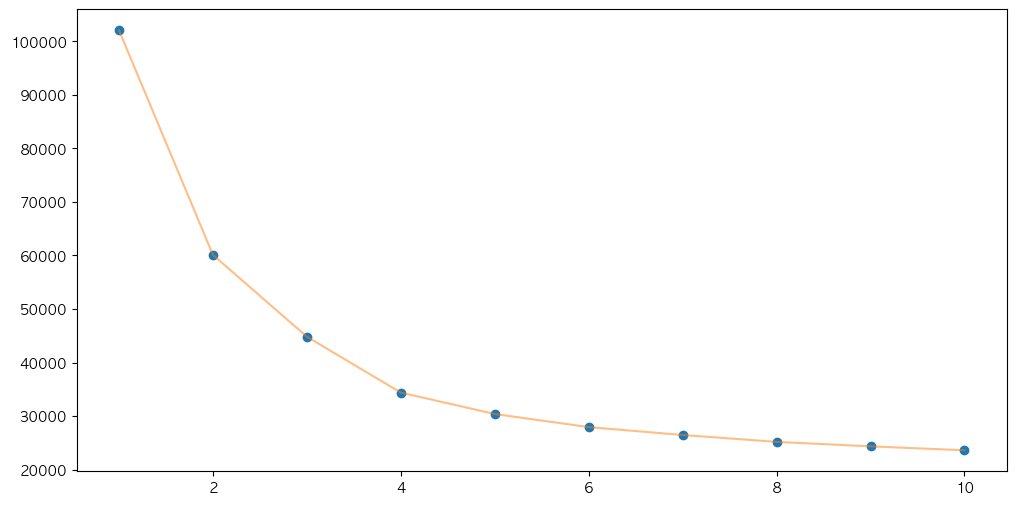

In [222]:
weekDF = df.loc[:, ['상권_구분_코드_명', '시군구명', '행정동_코드_명', '상권_코드_명',
                   '월요일_매출_비율', '화요일_매출_비율', '수요일_매출_비율', '목요일_매출_비율', 
                   '금요일_매출_비율', '토요일_매출_비율', '일요일_매출_비율', ]]

inertiaArr = []
k_length = range(1, 11)

for i in k_length :
    data_points = weekDF.iloc[:, 4:].values
    kmeans = KMeans(n_clusters=i).fit(data_points)
    inertia = kmeans.inertia_
    
    inertiaArr.append(inertia)
    
inertiaArr1 = np.array(inertiaArr)

plt.figure(1 , figsize = (12, 6))
plt.plot(k_length , inertiaArr1 , 'o')
plt.plot(k_length , inertiaArr1 , '-' , alpha = 0.5)

plt.show()

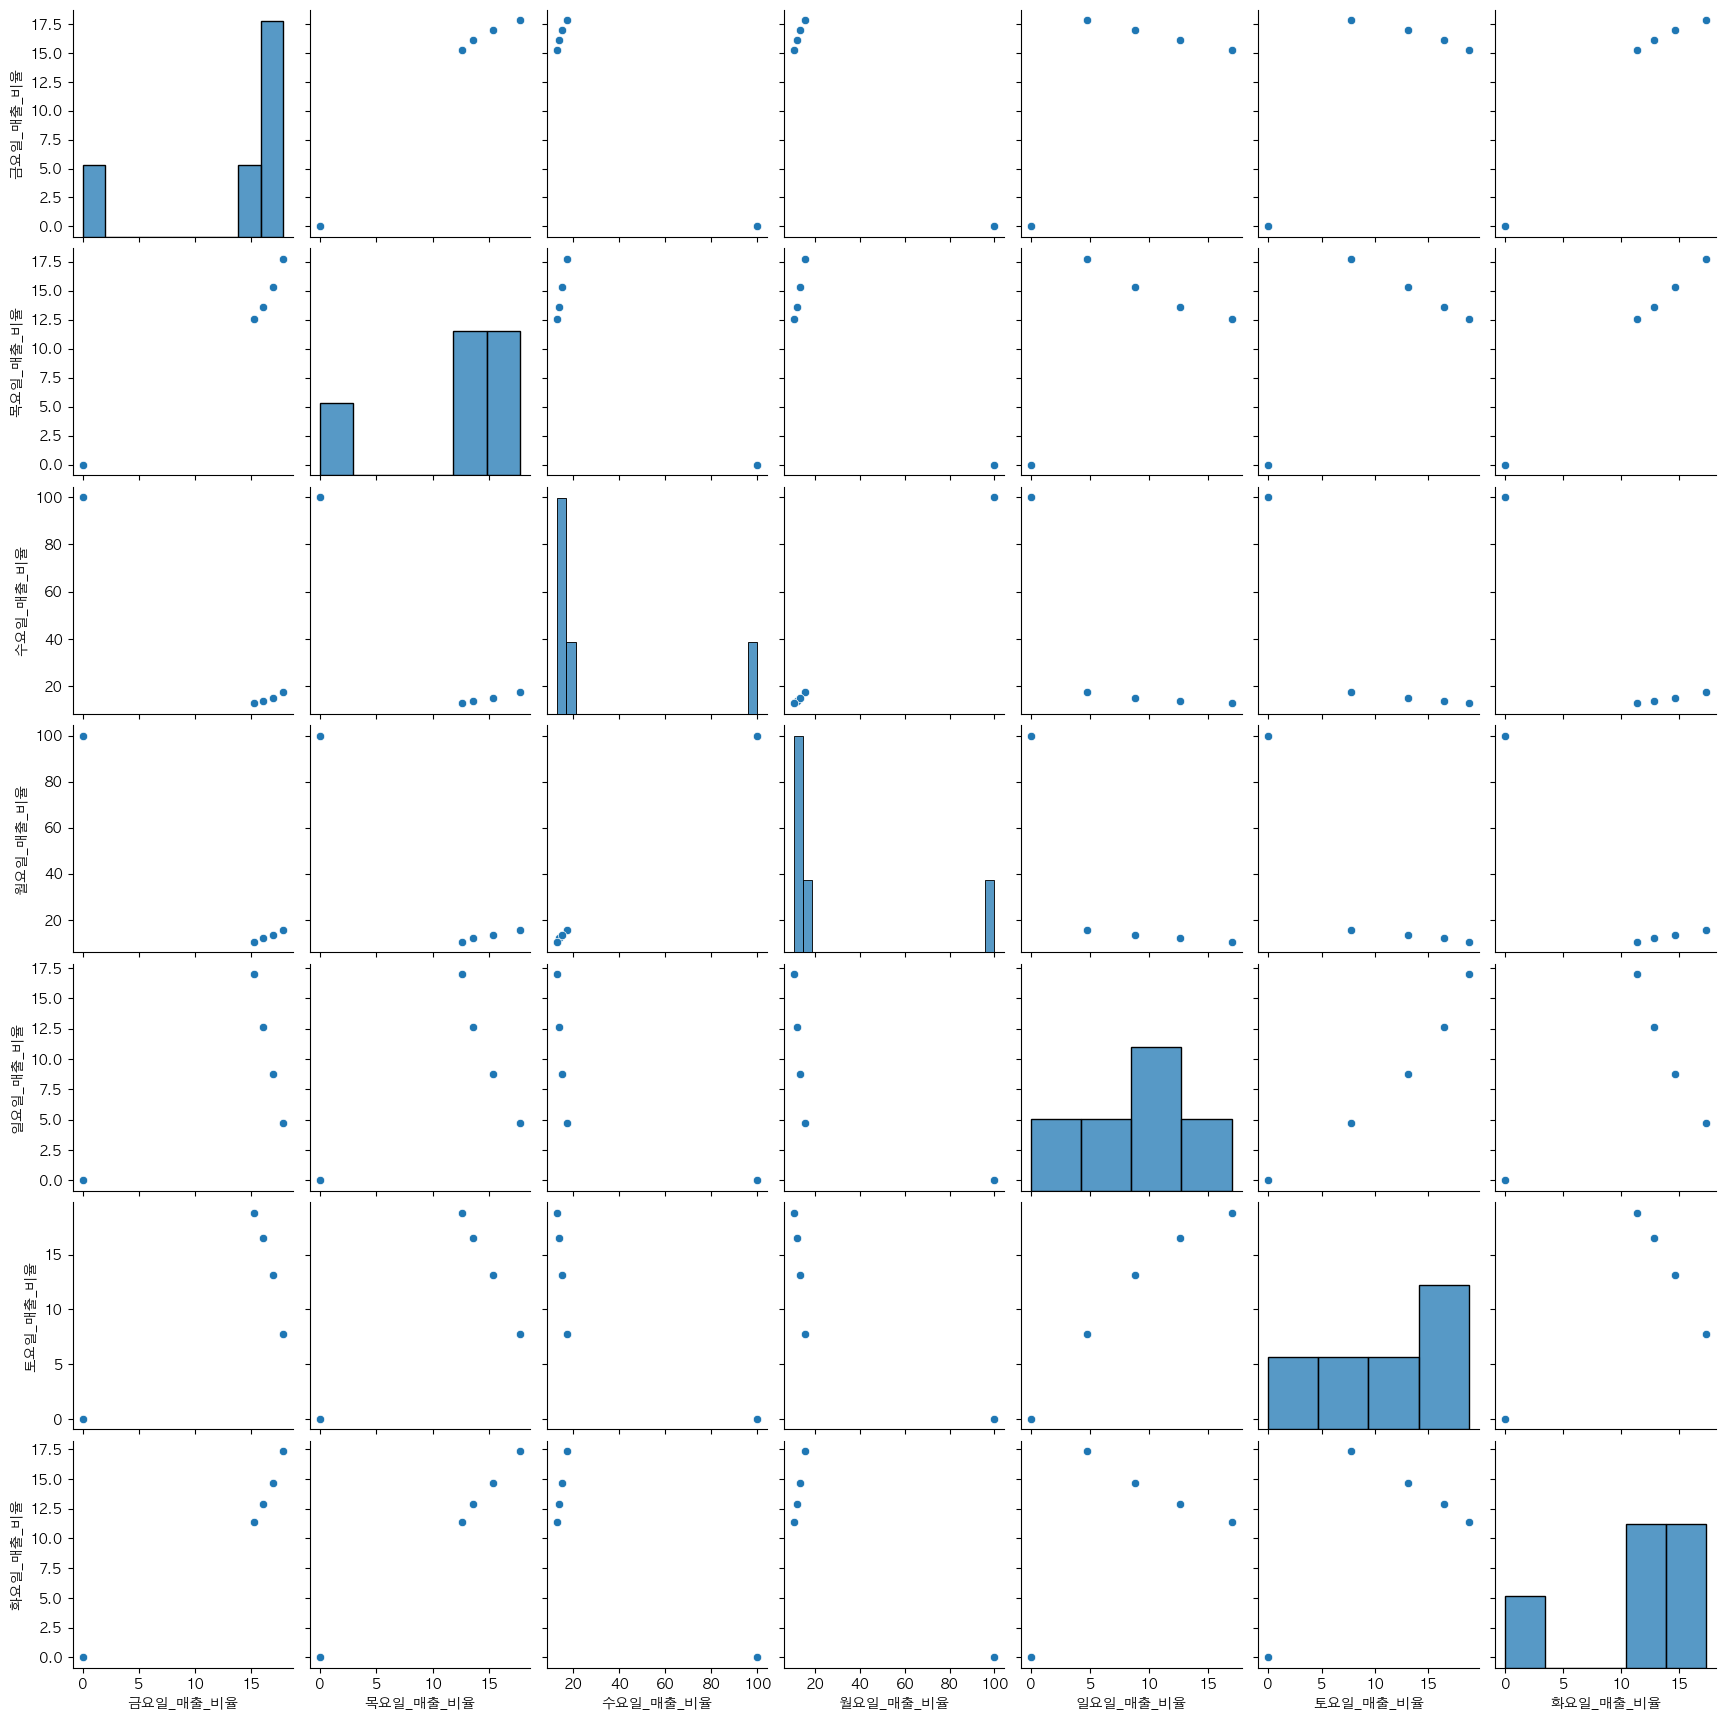

In [119]:
data_points = weekDF.iloc[:, 4:11].values
kmeans = KMeans(n_clusters = 5).fit(data_points)
weekDF['cluster_id'] = kmeans.labels_

weekCluster = pd.pivot_table(weekDF, index = 'cluster_id', values = weekDF.iloc[:, 4:11], aggfunc = 'mean')

sns.pairplot(weekCluster)
plt.show()

In [120]:
weekCluster

,금요일_매출_비율,목요일_매출_비율,수요일_매출_비율,월요일_매출_비율,일요일_매출_비율,토요일_매출_비율,화요일_매출_비율
cluster_id,,,,,,,
0,16.112204,13.563420,13.763121,11.939742,12.621818,16.474430,12.885032
1,17.855704,17.742217,17.367640,15.444878,4.771049,7.783162,17.331359
2,16.999113,15.347197,15.158269,13.317733,8.787778,13.101603,14.628753
3,0.000000,0.000000,100.000000,100.000000,0.000000,0.000000,0.000000
4,15.244607,12.564022,12.774016,10.459976,16.996169,18.806693,11.410884


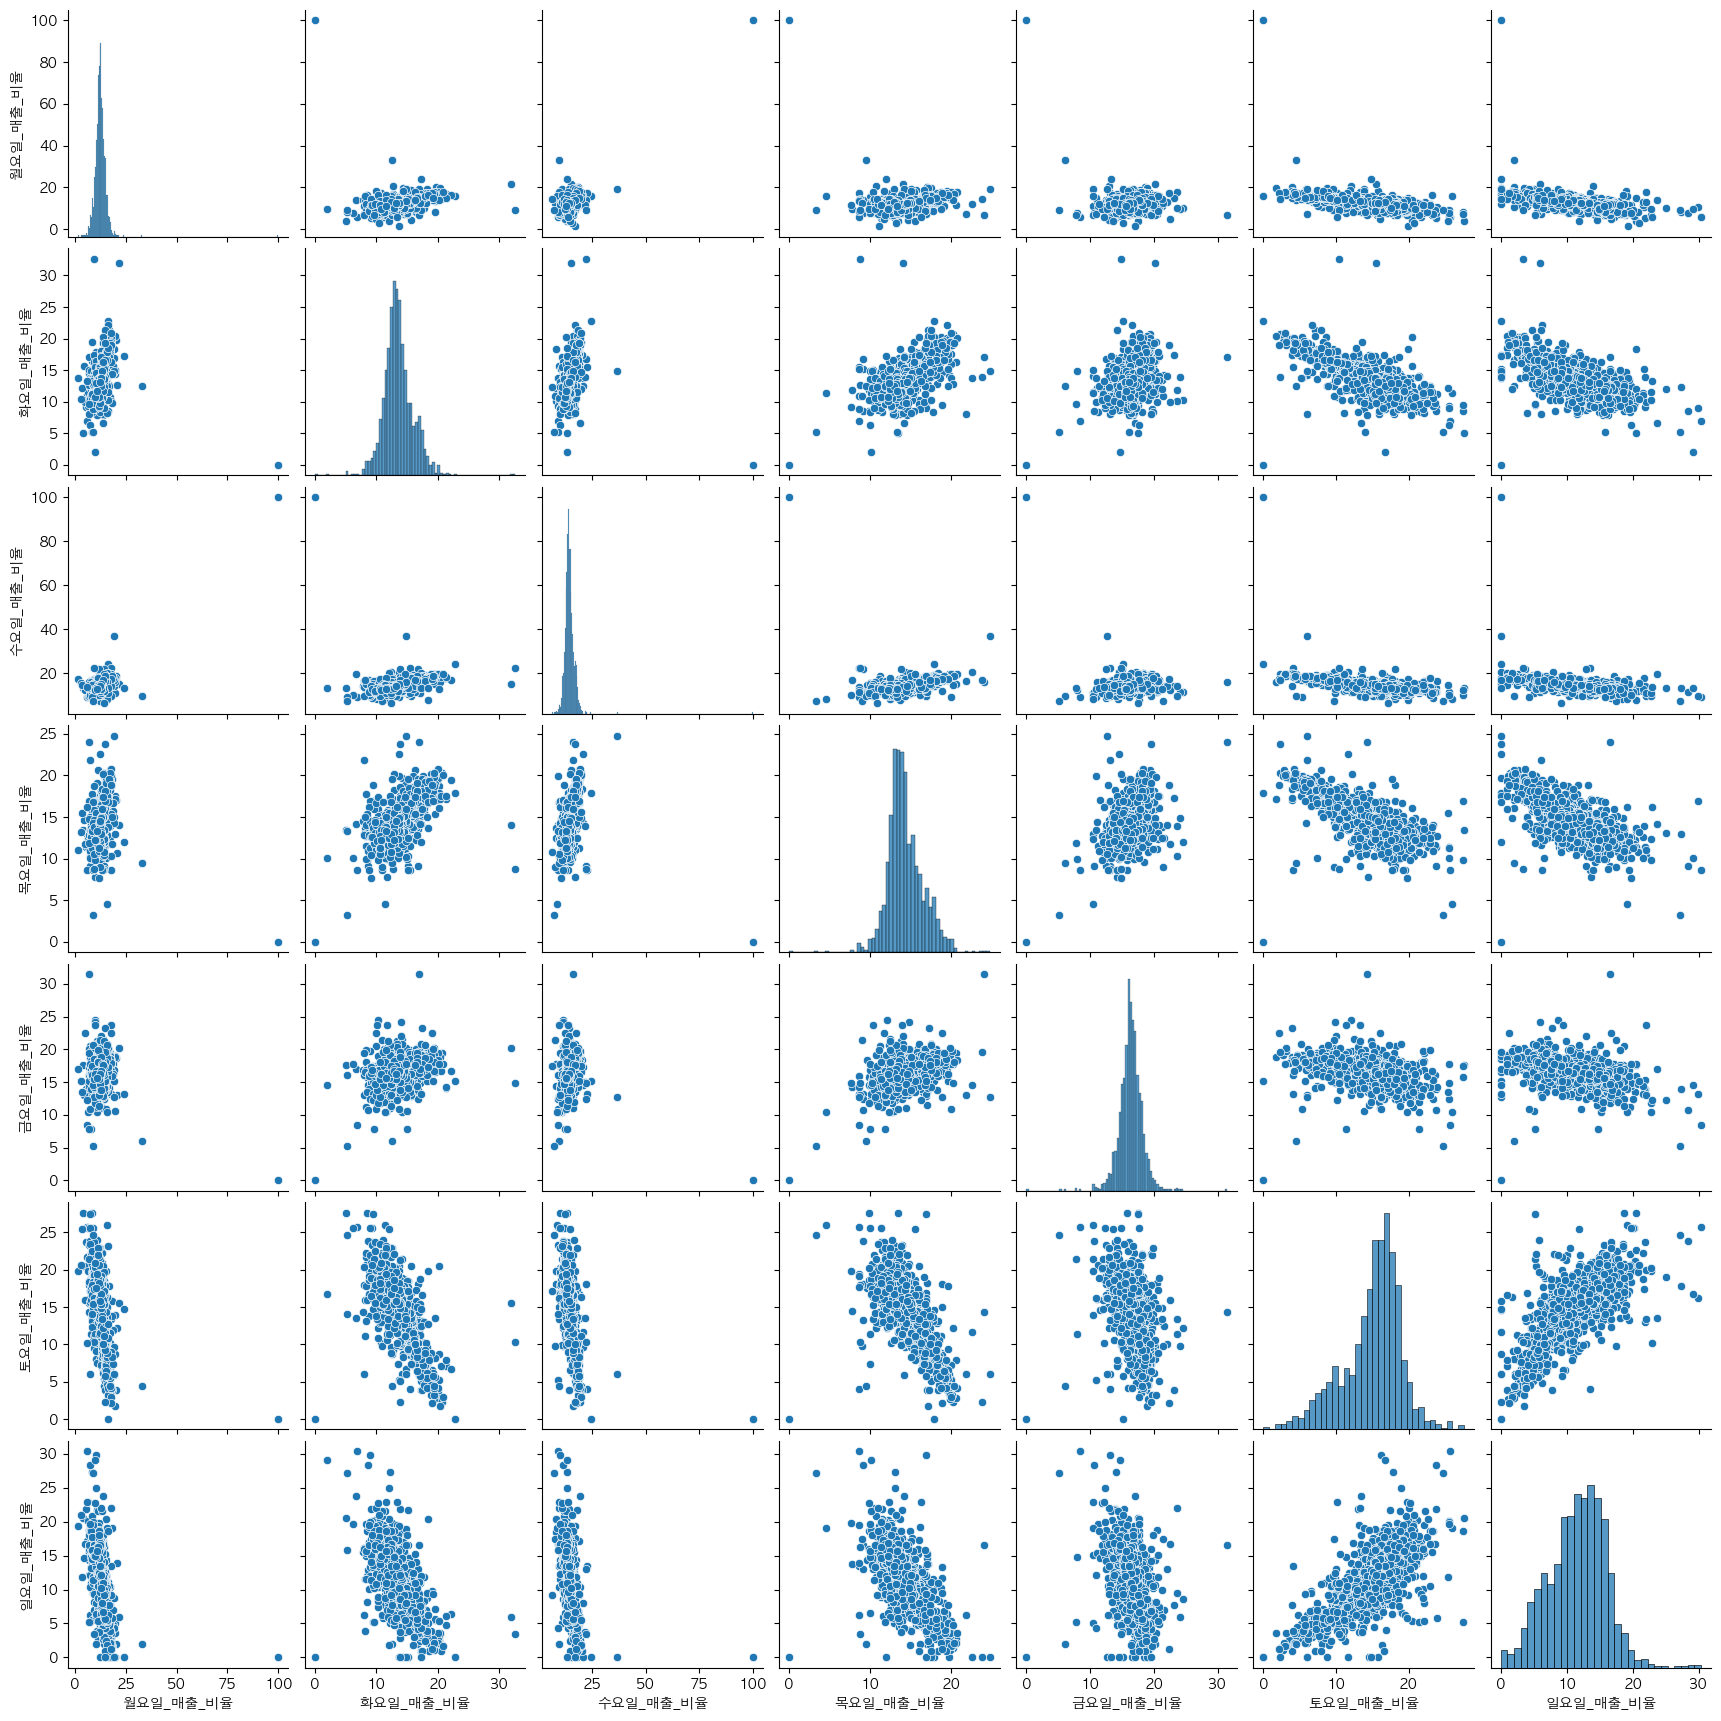

In [115]:
sns.pairplot(weekDF.iloc[:, 4:11])

In [223]:
weekDF

,상권_구분_코드_명,시군구명,행정동_코드_명,상권_코드_명,월요일_매출_비율,화요일_매출_비율,수요일_매출_비율,목요일_매출_비율,금요일_매출_비율,토요일_매출_비율,일요일_매출_비율
0,골목상권,종로구,청운효자동,옥인길,4.118702,4.997045,13.336265,13.420414,17.557236,27.636728,20.519313
1,골목상권,종로구,사직동,자하문로7길,8.632202,10.199244,12.870486,13.932939,16.204052,18.681832,14.574592
2,골목상권,종로구,사직동,필운대로1길,12.215847,13.081912,11.023989,12.183681,14.650525,19.606892,16.883306
3,골목상권,종로구,삼청동,북촌로5길,7.869752,11.001152,13.252861,11.072382,13.677012,20.360724,15.638756
4,골목상권,종로구,삼청동,북촌로5나길,10.334317,11.121795,13.556318,12.418514,14.106204,22.068820,19.545432
...,...,...,...,...,...,...,...,...,...,...,...
1463,관광특구,중구,소공동,명동 남대문 북창동 다동 무교동 관광특구,14.032727,16.247315,17.112630,17.405063,17.610004,10.089590,6.644820
1464,관광특구,중구,광희동,동대문패션타운 관광특구,12.765653,13.696635,14.957789,14.825908,16.757913,15.361710,10.185479
1465,관광특구,용산구,이태원1동,이태원 관광특구,9.731691,10.708618,12.293606,12.218461,16.196097,20.922236,14.918831
1466,관광특구,강남구,삼성1동,강남 마이스 관광특구,12.566569,13.151840,14.264583,14.522412,16.176919,15.750284,13.412963


In [ ]:
weekDF = df.loc[:, ['상권_구분_코드_명', '시군구명', '행정동_코드_명', '상권_코드_명',
                   '월요일_매출_비율', '화요일_매출_비율', '수요일_매출_비율', '목요일_매출_비율', 
                   '금요일_매출_비율', '토요일_매출_비율', '일요일_매출_비율', ]]

In [225]:
상권_코드_명 = ['1']
컬럼명 = ['1']


sales_ratio = [] # 매출비율 저장할 변수
name = [] # 상권명 저장할 변수
week_group = [] # 요일 저장할 변수

for i in range(len(weekDF)) :
    시간대별_매출 = [0]
    for j in range(4, 11) :
        if weekDF.iloc[i, j] > 시간대별_매출[0] :
            상권_코드_명[0] = weekDF.iloc[i, 3]
            컬럼명[0] = weekDF.columns[j]
            시간대별_매출[0] = weekDF.iloc[i, j]
            
    sales_ratio.append(시간대별_매출[0])
    name.append(상권_코드_명[0])
    week_group.append(컬럼명[0])
    
weekDF_02 = pd.DataFrame(name, sales_ratio)
weekDF_02['요일'] = week_group
weekDF_02.reset_index(inplace=True)
weekDF_02.columns = ['매출_비율', '상권_코드_명', '요일']

weekDF_02

,매출_비율,상권_코드_명,요일
0,27.636728,옥인길,토요일_매출_비율
1,18.681832,자하문로7길,토요일_매출_비율
2,19.606892,필운대로1길,토요일_매출_비율
3,20.360724,북촌로5길,토요일_매출_비율
4,22.068820,북촌로5나길,토요일_매출_비율
...,...,...,...
1463,17.610004,명동 남대문 북창동 다동 무교동 관광특구,금요일_매출_비율
1464,16.757913,동대문패션타운 관광특구,금요일_매출_비율
1465,20.922236,이태원 관광특구,토요일_매출_비율
1466,16.176919,강남 마이스 관광특구,금요일_매출_비율


In [21]:
city = pd.read_csv('../Data/salary_area.csv') # 상권 전체 데이터
city2021 = city[city.기준_년_코드 == 2021] # 상권 전체 데이터중 2021년도만 추출

# 상권별 매출 데이터 평균값
city2021_02 = pd.pivot_table(
                city2021, 
                index = ['상권_코드_명'], 
                values = ['XCNTS_VALU', 'YDNTS_VALU'],
                aggfunc = 'mean'
              )

city2021_02.reset_index(inplace=True) # index 초기화

# 좌표 데이터로 위도 경도 찾기
from pyproj import Proj, transform 

proj_UTMK = Proj(init='epsg:5181')
proj_WGS84 = Proj(init='epsg:4326')
latArr = []
lonArr = []

for long, lati in zip(city2021_02.XCNTS_VALU, city2021_02.YDNTS_VALU) :
    lon, lat = transform(proj_UTMK, proj_WGS84, long, lati)
    
    latArr.append(lat)
    lonArr.append(lon)
    
city2021_02['위도'] = latArr
city2021_02['경도'] = lonArr

# 필요없는 컬럼 제거
city2021_02.drop([city2021_02.columns[1], city2021_02.columns[2]], axis=1, inplace=True)
city2021_02

,상권_코드_명,위도,경도
0,가락시장,37.494070,127.113488
1,가로공원로58길,37.533090,126.825414
2,가로공원로76가길,37.533706,126.840574
3,가로공원로80길,37.536435,126.839855
4,가리봉시장,37.481576,126.889346
...,...,...,...
1480,휘경로2길,37.595111,127.060512
1481,휘경로3길,37.597506,127.063050
1482,흑석로13길,37.509822,126.959825
1483,흑석로9길,37.507965,126.958118


In [228]:
ageDF = pd.merge(ageDF, city2021_02, how = 'inner', on = '상권_코드_명')
timeDF_02 = pd.merge(timeDF_02, city2021_02, how = 'inner', on = '상권_코드_명')
genderDF = pd.merge(genderDF, city2021_02, how = 'inner', on = '상권_코드_명')
weekDF_02 = pd.merge(weekDF_02, city2021_02, how = 'inner', on = '상권_코드_명')

In [230]:
ageDF.to_csv('../Data/ageDF.csv', index=False)
timeDF_02.to_csv('../Data/timeDF.csv', index=False)
genderDF.to_csv('../Data/genderDF.csv', index=False)
weekDF_02.to_csv('../Data/weekDF.csv', index=False)

In [231]:
timeDF_02

,매출_비율,상권_코드_명,시간대,위도,경도
0,28.589645,옥인길,시간대_17~21_매출_비율,37.580697,126.966478
1,38.479648,자하문로7길,시간대_17~21_매출_비율,37.579085,126.970328
2,32.929625,필운대로1길,시간대_11~14_매출_비율,37.578066,126.966615
3,31.970780,북촌로5길,시간대_17~21_매출_비율,37.580349,126.981694
4,35.222309,북촌로5나길,시간대_17~21_매출_비율,37.585791,126.983017
...,...,...,...,...,...
1463,30.589270,명동 남대문 북창동 다동 무교동 관광특구,시간대_11~14_매출_비율,37.564149,126.981856
1464,31.321319,동대문패션타운 관광특구,시간대_17~21_매출_비율,37.567312,127.011025
1465,39.348431,이태원 관광특구,시간대_17~21_매출_비율,37.534435,126.994377
1466,36.960781,강남 마이스 관광특구,시간대_11~14_매출_비율,37.511003,127.060059


In [233]:
weekDF_02.요일.unique()

array(['토요일_매출_비율', '일요일_매출_비율', '금요일_매출_비율', '수요일_매출_비율', '화요일_매출_비율',
       '월요일_매출_비율', '목요일_매출_비율'], dtype=object)